Changes : 

* From (1) S12's don't match. Unclear what the issue is. The highest transmission is when there seems to be strong higher order in the waveguide -- issue with eigenmode decomposition? 
* For simplicity, since we know S12 = S21 should hold for LTI system, we'll just source from the waveguide. Also, just look at diretionality for now and compare with fiber mode later.

So in compute, remove  the look over sources and hardcode 1 = waveguide.
In the script, remove all references to fiber, and add the near-2-far monitor. Remove eigemode measurements.

In [1]:
from gc_outcoupler2 import initialize

Using MPI version 3.1, 1 processes


In [2]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-period', type=float, default=0.767723445279288, help='grating period (default: 0.767723445279288 um)')
parser.add_argument('-FF', type=float, default=0.5, help='Fill factor (default: 0.5 um)')
parser.add_argument('-theta', type=float, default=8, help='fiber_angle (default: 8 degrees)')    
parser.add_argument('-x', type=float, default=1, help='Fiber position (default: 1 um)')
parser.add_argument('-source', type=int, default=0, help='1 for waveguide, 0 for fiber')   
parser.add_argument('-filename', type=str, default='default', help='data name')  
args = parser.parse_args()
sim, neafielf, monitor = initialize(args)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000632048 s
Working in 2D dimensions.
Computational cell is 28.0469 x 8.64062 x 0 with resolution 64
     block, center = (-0.525649,1.1,0)
          size (1e+20,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4.0409,4.0409,4.0409)
     block, center = (-0.333718,1.1,0)
          size (0.383862,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0.434005,1.1,0)
          size (0.383862,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (1.20173,1.1,0)
          size (0.383862,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (1.96945,1.1,0)
          size (0.383862,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric consta

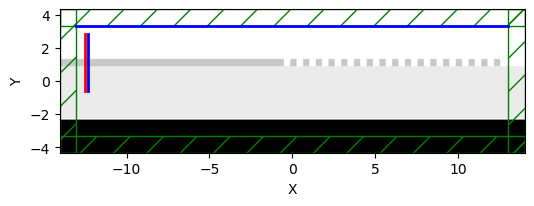

In [3]:
import matplotlib.pyplot as plt

f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [4]:
!mpirun -np 8 python gc_outcoupler2.py -period 0.5 -FF 0.5 -theta 8 -x 1 -source 1 -filename 'test' > ./logs/test.log

In [7]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./data') if isfile(join('./data', f))]

In [8]:
onlyfiles[0]

'test.pickle'

In [9]:
import pickle

dbfile = open('./data/' + onlyfiles[0], 'rb')
db = pickle.load(dbfile)
dbfile.close()

In [10]:
db

{'params': {'a': 0.5, 'FF': 0.5, 'theta': 8.0, 'x': 1.0, 'source': 1},
 'farfield_angles': array([0.        , 0.00314159, 0.00628319, 0.00942478, 0.01256637,
        0.01570796, 0.01884956, 0.02199115, 0.02513274, 0.02827433,
        0.03141593, 0.03455752, 0.03769911, 0.0408407 , 0.0439823 ,
        0.04712389, 0.05026548, 0.05340708, 0.05654867, 0.05969026,
        0.06283185, 0.06597345, 0.06911504, 0.07225663, 0.07539822,
        0.07853982, 0.08168141, 0.084823  , 0.08796459, 0.09110619,
        0.09424778, 0.09738937, 0.10053096, 0.10367256, 0.10681415,
        0.10995574, 0.11309734, 0.11623893, 0.11938052, 0.12252211,
        0.12566371, 0.1288053 , 0.13194689, 0.13508848, 0.13823008,
        0.14137167, 0.14451326, 0.14765485, 0.15079645, 0.15393804,
        0.15707963, 0.16022123, 0.16336282, 0.16650441, 0.169646  ,
        0.1727876 , 0.17592919, 0.17907078, 0.18221237, 0.18535397,
        0.18849556, 0.19163715, 0.19477874, 0.19792034, 0.20106193,
        0.20420352, 0.2073

In [11]:
import numpy as np

farfield_power = db['farfield_power']
farfield_angles = db['farfield_angles']

Ex=farfield_power[:,0]
Ey=farfield_power[:,1]
Ez=farfield_power[:,2]
Hx=farfield_power[:,3]
Hy=farfield_power[:,4]
Hz=farfield_power[:,5]
Ex=np.conj(Ex)
Ey=np.conj(Ey)
Ez=np.conj(Ez)
Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
Pr=np.sqrt(np.square(Px)+np.square(Py))
Pnorm = Pr/np.max(Pr)

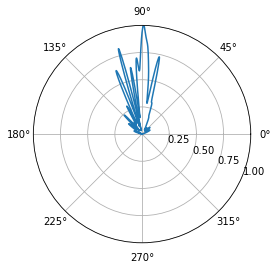

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(farfield_angles, Pnorm)
ax.set_rmax(1)
ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [24]:
1/64

0.015625

In [6]:
import numpy as np
np.linspace(0.1, 0.9, 9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Maybe we should monitor the outgoing power too. Let's add a mode monitor again. (reload). Also gives reflection.